# This script hold necessary `classes` which implements the `Linear Regression` algorithm with `Backpropagation`

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Associated Formulae for the `LinearRegression` Class

**Hypothesis function:**
\begin{equation}
h_{\theta}(X) = \theta^T X + b = \theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + \theta_3 \cdot X_3 + \theta_4 \cdot X_4
\end{equation}

**Mean Squared Error (MSE) Loss function:**
\begin{equation}
J(\theta, b) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(X^{(i)}) - y^{(i)})^2
\end{equation}

**Gradient of the Loss function with respect to weights ($\theta$) and bias ($b$):**
\begin{equation}
\frac{\partial J}{\partial \theta} = \frac{1}{m} X^T(h_{\theta}(X) - y)
\end{equation}
\begin{equation}
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(X^{(i)}) - y^{(i)})
\end{equation}

**Parameter Update (Gradient Descent):**
\begin{equation}
\theta := \theta - \alpha \frac{\partial J}{\partial \theta}
\end{equation}
\begin{equation}
b := b - \alpha \frac{\partial J}{\partial b}
\end{equation}

**Prediction:**
\begin{equation}
y_{\text{pred}} = h_{\theta}(X)
\end{equation}

**Normalization of Features:**
\begin{equation}
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\end{equation}

Here,
- $\theta_0 = b$ is the bias term,
- $\theta_1$ corresponds to the weight for Power Demand, $X_1$,
- $\theta_2$ corresponds to the weight for Month, $X_2$,
- $\theta_3$ corresponds to the weight for Day of the Week, $X_3$,
- $\theta_4$ corresponds to the weight for Time of the Day, $X_4$,
- $m$ is the number of training examples.


# The class for `Linear Regression`

In [29]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [30]:
csv_file = 'simulated_voltage_unbalance_data.csv'

In [31]:
data = pd.read_csv(csv_file)

# Training Our `LinearRegressor` model using the `csv_file` data

In [32]:
# X contains the features and y contains the target variable (voltage unbalance)
X = np.array(data[['Power Demand (MW)', 'Month', 'Day of the Week', 'Time of the Day (Hour)']])
y = np.array(data['Voltage Unbalance'])

# Normalize features
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Add bias term
X_normalized = np.hstack((X_normalized, np.ones((X_normalized.shape[0], 1))))

# Initialize and train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_normalized, y)

# Print learned weights
print("Learned weights:", model.weights)

# Predict
predictions = model.predict(X_normalized)

Learned weights: [0.03532779 0.01283355 0.03982089 0.10873562 0.04940442]


# Model Evaluation

In [33]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Predict on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE on training and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.0028690635696877642
Test MSE: 0.002726562557570657


# Visualization of our prediction against actual Measurements

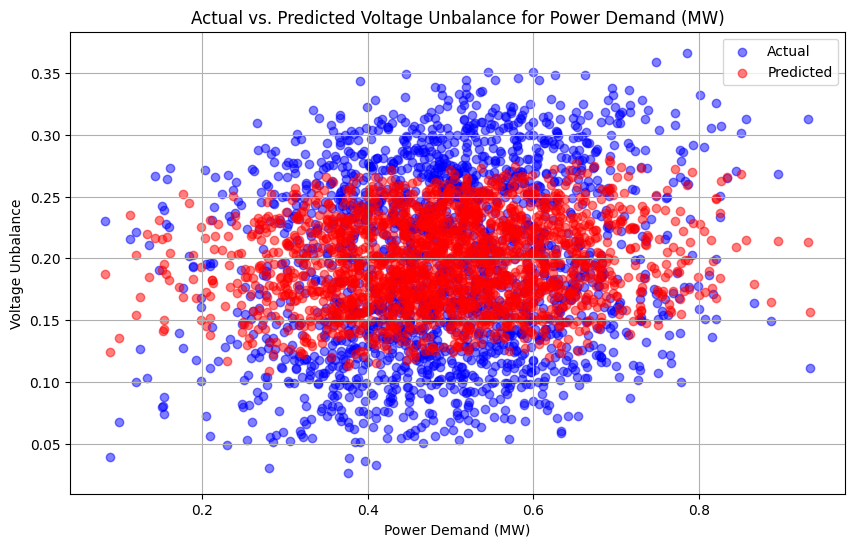

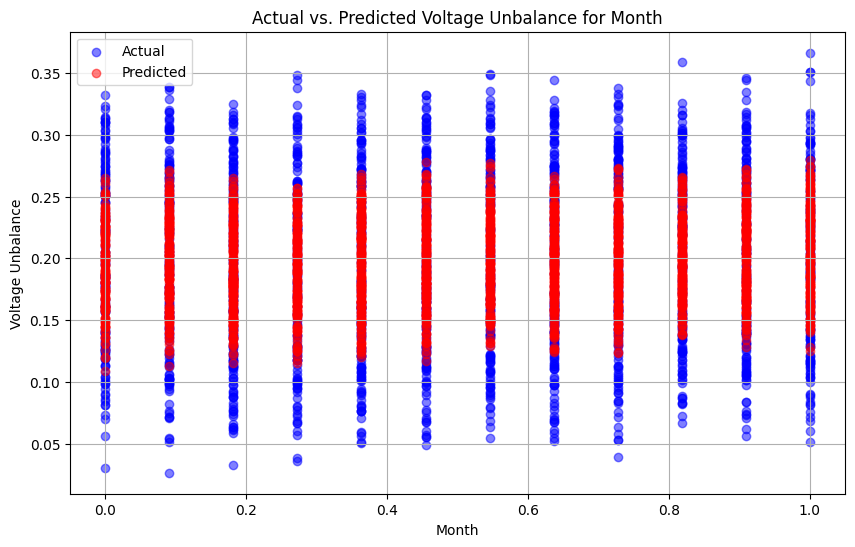

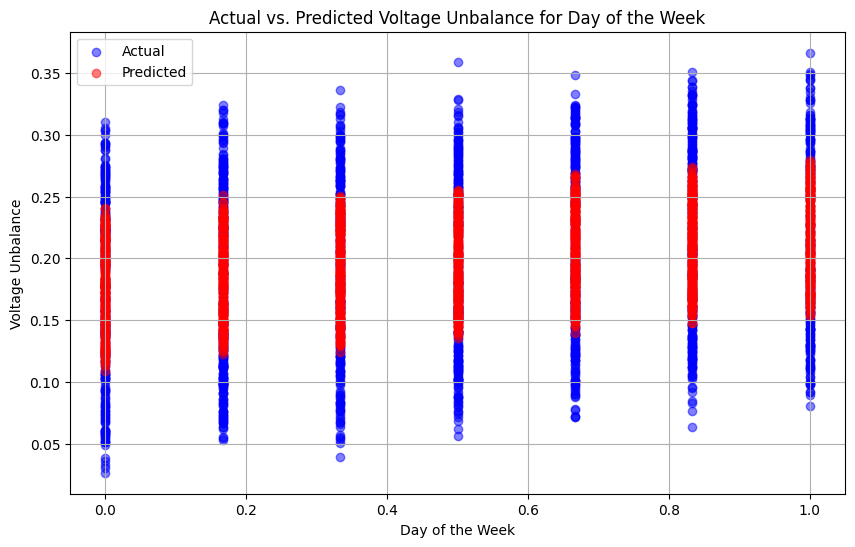

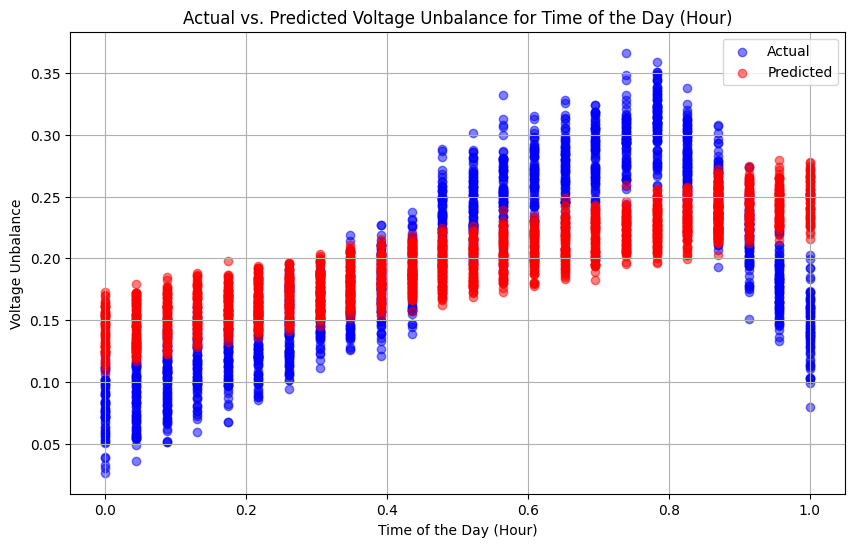

In [34]:
# Plot actual vs. predicted for each feature using the test set
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot actual vs. predicted
    plt.scatter(X_test[:, features.index(feature)], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[:, features.index(feature)], test_predictions, color='red', label='Predicted', alpha=0.5)
    
    plt.xlabel(feature)
    plt.ylabel('Voltage Unbalance')
    plt.title(f'Actual vs. Predicted Voltage Unbalance for {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()